#  import data set

In [5]:
import pandas as pd


In [6]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B66D-EEDA

 Directory of C:\Users\DELL\Documents\Pune @ Exelr\Linear Regration

06-08-2021  11:07    <DIR>          .
06-08-2021  11:07    <DIR>          ..
05-08-2021  12:45    <DIR>          .ipynb_checkpoints
06-08-2021  11:07            70,397 LR homework.ipynb
06-08-2021  11:01            69,216 new-linear-regression.ipynb
05-08-2021  12:33             1,240 NewspaperData.csv
05-08-2021  12:35             1,170 WC_AT - WC_AT.csv
               4 File(s)        142,023 bytes
               3 Dir(s)  198,560,808,960 bytes free


In [7]:
data=pd.read_csv("WC_AT - WC_AT.csv")

In [8]:
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


# 2 correlation

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [10]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Waist', ylabel='Density'>

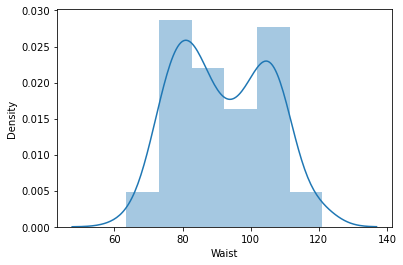

In [11]:
import seaborn as sns
sns.distplot(data['Waist'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AT', ylabel='Density'>

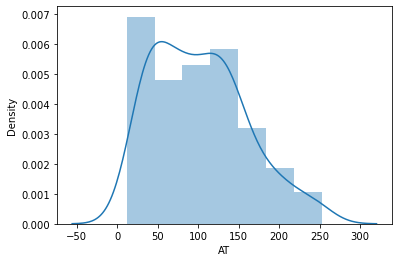

In [12]:
import seaborn as sns
sns.distplot(data['AT'])

In [13]:
import statsmodels.formula.api as smf
model = smf.ols("AT~Waist",data = data).fit()

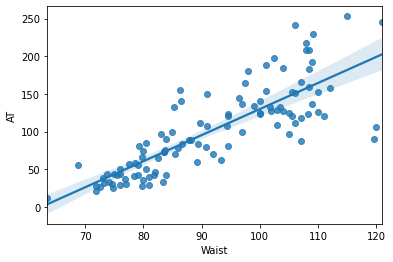

In [14]:
sns.regplot(x="Waist", y="AT", data=data);

In [16]:
# Coefficients
model.params


Intercept   -215.981488
Waist          3.458859
dtype: float64

In [17]:
# t and p-Values
print(model.tvalues, '\n', model.pvalues)  

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [18]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.6700368930528429, 0.6669531256981966)

#  Predict for new data point

In [19]:
# Predict for 81.80 and 83.95 daily circulation
newdata=pd.Series([81.80,83.95])

In [20]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])

In [21]:
model.predict(data_pred)

0    66.953210
1    74.389758
dtype: float64